In [24]:
import  scipy.signal.signaltools

def _centered(arr, newsize):
    # Return the center newsize portion of the array.
    newsize = np.asarray(newsize)
    currsize = np.array(arr.shape)
    startind = (currsize - newsize) // 2
    endind = startind + newsize
    myslice = [slice(startind[k], endind[k]) for k in range(len(endind))]
    return arr[tuple(myslice)]

scipy.signal.signaltools._centered = _centered

In [25]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from patsy import dmatrix
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score, roc_curve, auc, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, ParameterGrid, RandomizedSearchCV
from sklearn.ensemble import BaggingRegressor,BaggingClassifier,RandomForestRegressor,RandomForestClassifier
from sklearn.ensemble import VotingRegressor, StackingRegressor
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.cluster import KMeans
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant
import datetime 
import holidays
from statsmodels.tsa.stattools import pacf
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler

# suppressing warnings
import warnings
warnings.filterwarnings("ignore")

# Dropping Data

In [26]:
data = pd.read_csv('data/merged_cleaned_processed.csv')
data

,Unnamed: 0,date,location,year,mmwr_week,covid_19_deaths,distributed,distributed_janssen,distributed_moderna,distributed_pfizer,...,month,region_East,region_Midwest,region_Puerto Rico,region_South,region_West,season_Fall,season_Spring,season_Summer,season_Winter
0,0,2020-01-04,AL,2020,1,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,1,0,0,0,0,1
1,1,2020-01-04,LA,2020,1,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,1,0,0,0,0,1
2,2,2020-01-04,VA,2020,1,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,1,0,0,0,0,1
3,3,2020-01-04,KY,2020,1,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,1,0,0,0,0,1
4,4,2020-01-04,KS,2020,1,0.0,0.0,0.0,0.0,0.0,...,1,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8944,8944,2024-01-06,OH,2024,1,23.0,0.0,0.0,0.0,0.0,...,1,0,1,0,0,0,0,0,0,1
8945,8945,2024-01-06,NY,2024,1,145.0,0.0,0.0,0.0,0.0,...,1,1,0,0,0,0,0,0,0,1
8946,8946,2024-01-06,NJ,2024,1,39.0,0.0,0.0,0.0,0.0,...,1,1,0,0,0,0,0,0,0,1
8947,8947,2024-01-06,NH,2024,1,12.0,0.0,0.0,0.0,0.0,...,1,1,0,0,0,0,0,0,0,1


In [27]:
missing_vals = data.isnull().sum()
missing_df = pd.DataFrame({'feature': missing_vals.index, 'num_missing': missing_vals.values})
missing_df.sort_values(by = ['num_missing'], ascending = False)

,feature,num_missing
90,second_booster,8949
105,bivalent_booster_5plus_pop_pct,7679
104,bivalent_booster_5plus,7679
111,bivalent_booster_65plus_pop_pct,7636
107,bivalent_booster_12plus_pop_pct,7636
...,...,...
5,covid_19_deaths,0
4,mmwr_week,0
3,year,0
2,location,0


In [28]:
data

,Unnamed: 0,date,location,year,mmwr_week,covid_19_deaths,distributed,distributed_janssen,distributed_moderna,distributed_pfizer,...,month,region_East,region_Midwest,region_Puerto Rico,region_South,region_West,season_Fall,season_Spring,season_Summer,season_Winter
0,0,2020-01-04,AL,2020,1,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,1,0,0,0,0,1
1,1,2020-01-04,LA,2020,1,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,1,0,0,0,0,1
2,2,2020-01-04,VA,2020,1,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,1,0,0,0,0,1
3,3,2020-01-04,KY,2020,1,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,1,0,0,0,0,1
4,4,2020-01-04,KS,2020,1,0.0,0.0,0.0,0.0,0.0,...,1,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8944,8944,2024-01-06,OH,2024,1,23.0,0.0,0.0,0.0,0.0,...,1,0,1,0,0,0,0,0,0,1
8945,8945,2024-01-06,NY,2024,1,145.0,0.0,0.0,0.0,0.0,...,1,1,0,0,0,0,0,0,0,1
8946,8946,2024-01-06,NJ,2024,1,39.0,0.0,0.0,0.0,0.0,...,1,1,0,0,0,0,0,0,0,1
8947,8947,2024-01-06,NH,2024,1,12.0,0.0,0.0,0.0,0.0,...,1,1,0,0,0,0,0,0,0,1


In [29]:
data = data.drop([ 'second_booster_50plus_vax_pct',
 'second_booster_65plus_vax_pct',
 'additional_doses_5plus_vax_pct',
 'bivalent_booster_12plus_pop_pct',
 'bivalent_booster_18plus_pop_pct',
 'bivalent_booster_5plus_pop_pct',
 'bivalent_booster_65plus_pop_pct', 'Unnamed: 0'], axis=1)

In [36]:
data['date'] = pd.DatetimeIndex(data['date'])
data['year'] = pd.DatetimeIndex(data['date']).year
data['month'] = pd.DatetimeIndex(data['date']).month

In [37]:
data

,date,location,year,mmwr_week,covid_19_deaths,distributed,distributed_janssen,distributed_moderna,distributed_pfizer,distributed_novavax,...,region_East,region_Midwest,region_Puerto Rico,region_South,region_West,season_Fall,season_Spring,season_Summer,season_Winter,day
0,2020-01-04,AL,2020,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,1,4
1,2020-01-04,LA,2020,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,1,4
2,2020-01-04,VA,2020,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,1,4
3,2020-01-04,KY,2020,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,1,4
4,2020-01-04,KS,2020,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8944,2024-01-06,OH,2024,1,23.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,1,6
8945,2024-01-06,NY,2024,1,145.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,1,6
8946,2024-01-06,NJ,2024,1,39.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,1,6
8947,2024-01-06,NH,2024,1,12.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,1,6


# Univariate Analysis

# Univariate Dataframe 

In [155]:
univariate_df = data[['date', 'covid_19_deaths']]

univariate_df = univariate_df.set_index('date')

In [156]:
univariate_combined = data[['date', 'covid_19_deaths']]
univariate_combined = univariate_combined.groupby('date').sum()

# Hist 

In [37]:
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

<AxesSubplot:xlabel='covid_19_deaths', ylabel='Count'>

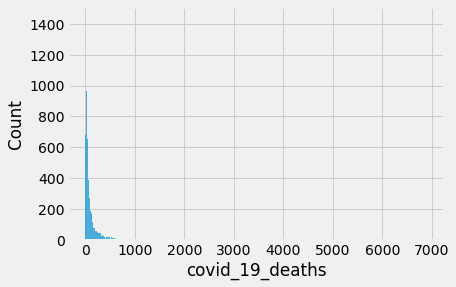

In [38]:
sns.histplot( data['covid_19_deaths'], kde=False )

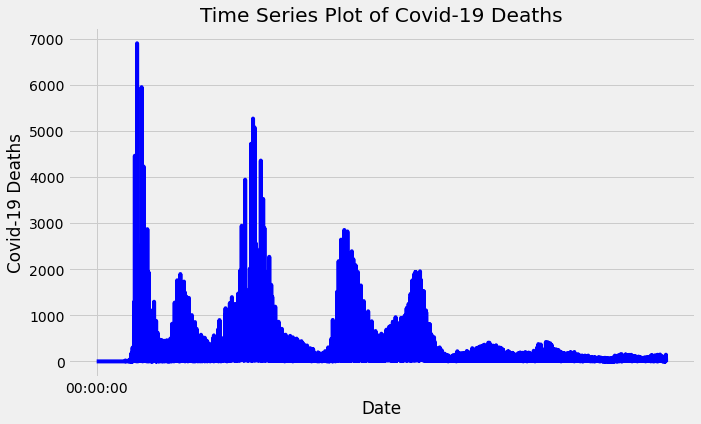

Descriptive Statistics:
count    8949.000000
mean      130.334674
std       284.628426
min         0.000000
25%        21.000000
50%        48.000000
75%       123.000000
max      6900.000000
Name: covid_19_deaths, dtype: float64


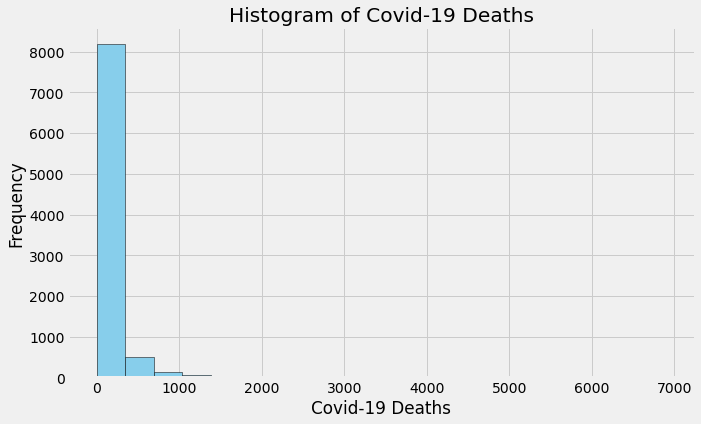

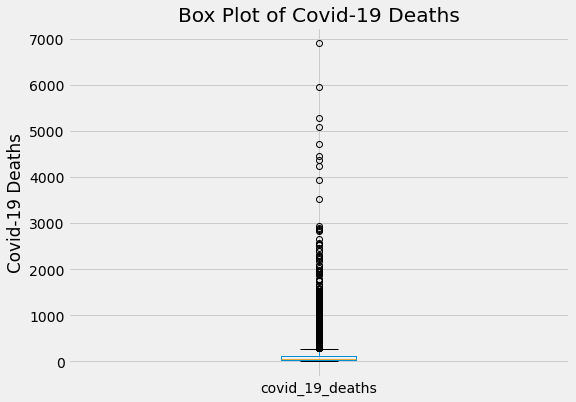

In [39]:
# Assuming 'data' contains your dataset with a DateTime index and a column named 'covid_19_deaths'
data.index = pd.to_datetime(data.index)

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(data['covid_19_deaths'], color='blue')
plt.title('Time Series Plot of Covid-19 Deaths')
plt.xlabel('Date')
plt.ylabel('Covid-19 Deaths')
plt.grid(True)
plt.show()

# Descriptive statistics
print("Descriptive Statistics:")
print(data['covid_19_deaths'].describe()) 

# Distribution plot
plt.figure(figsize=(10, 6))
plt.hist(data['covid_19_deaths'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Covid-19 Deaths')
plt.xlabel('Covid-19 Deaths')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Box plot
plt.figure(figsize=(8, 6))
data.boxplot(column='covid_19_deaths')
plt.title('Box Plot of Covid-19 Deaths')
plt.ylabel('Covid-19 Deaths')
plt.grid(True)
plt.show()


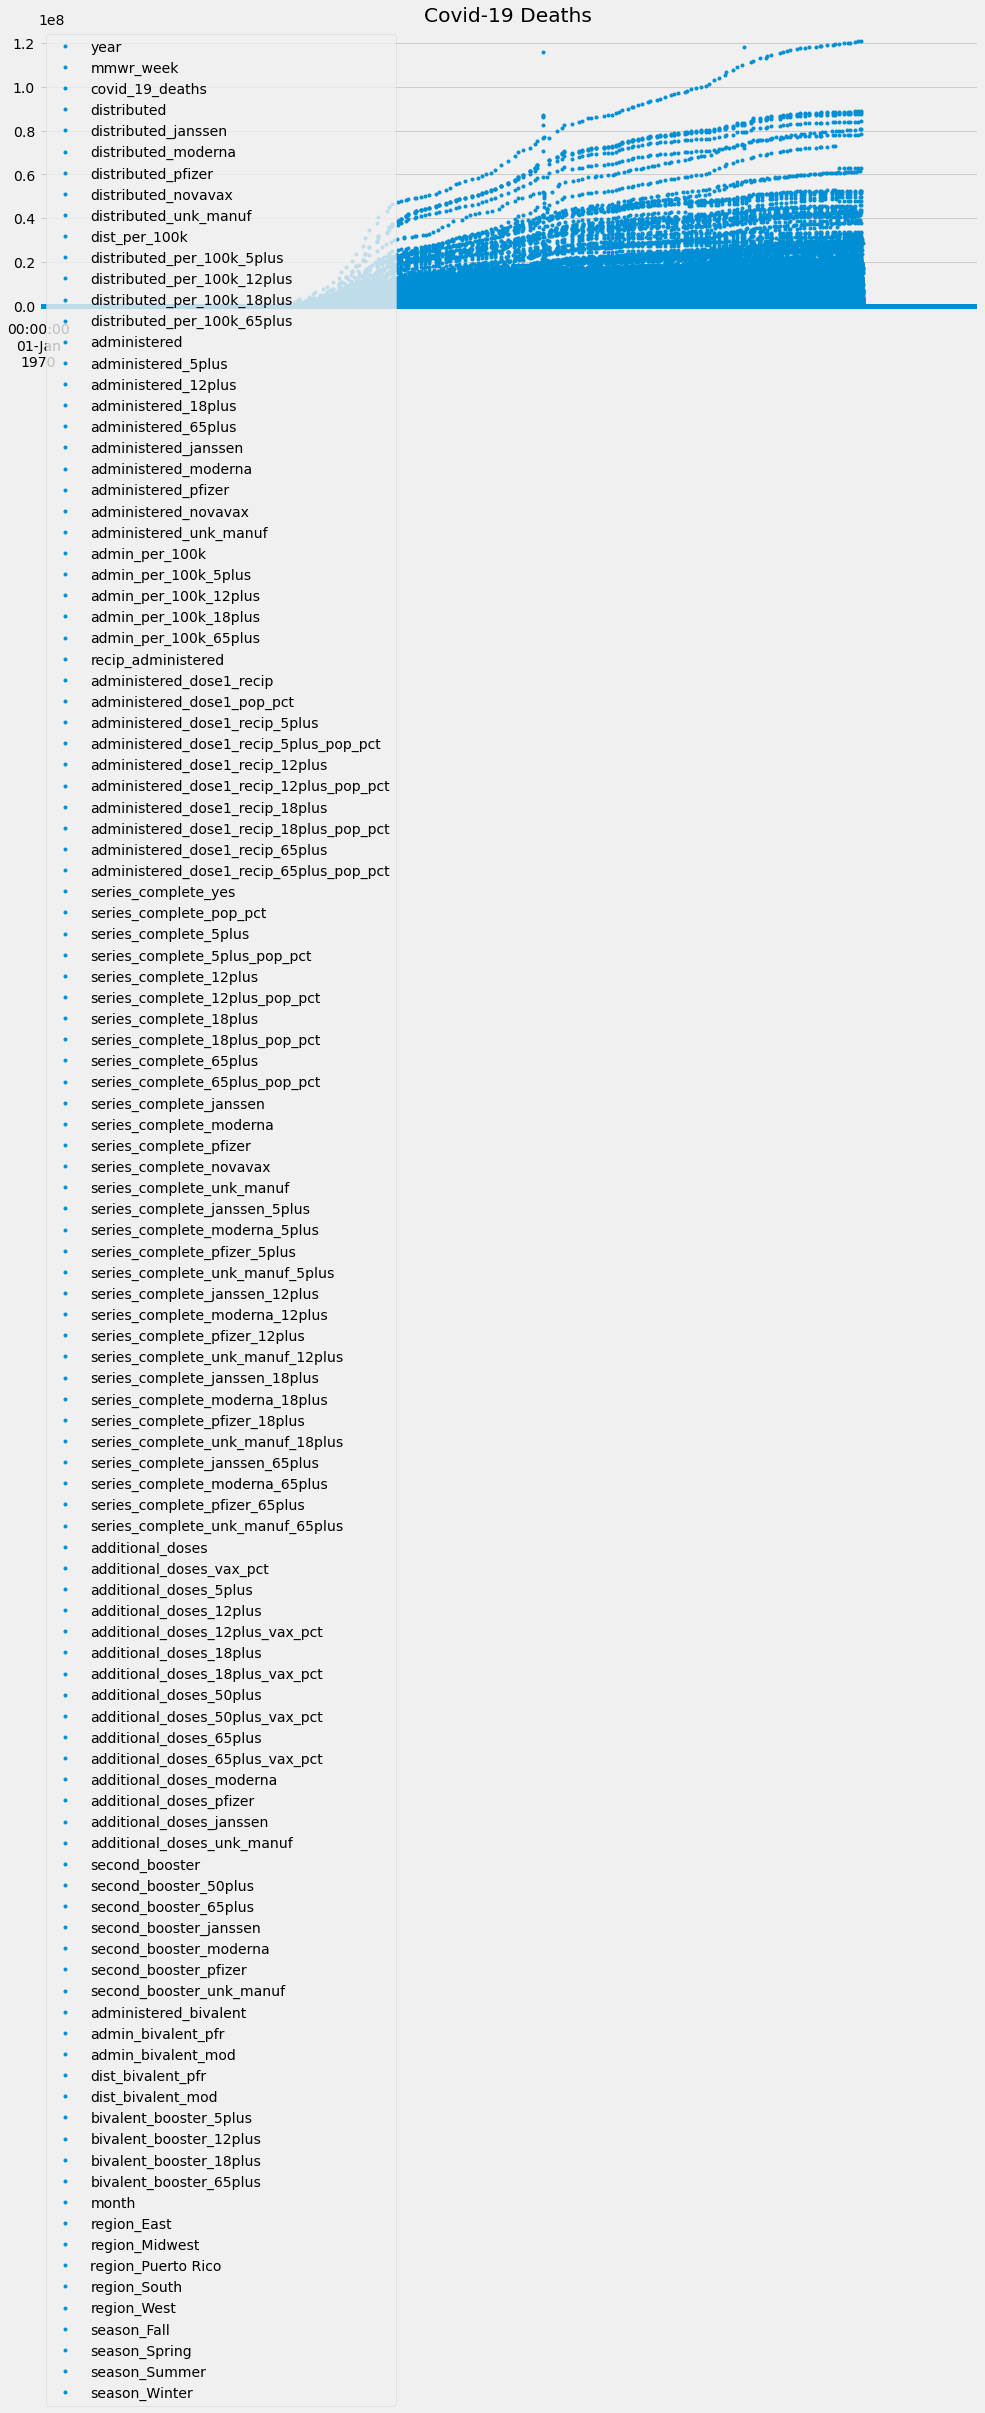

In [40]:
data.plot(style='.',
        figsize=(15, 5),
        color=color_pal[0],
        title='Covid-19 Deaths')
plt.show()

# Seasonal

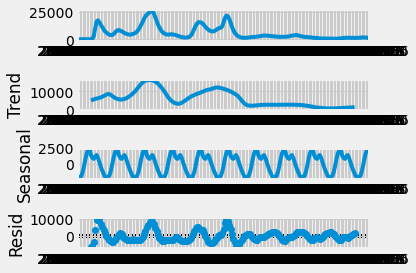

In [41]:
seasonal_decompose(univariate_combined, period = 20).plot()

plt.show()

# AC + PACF - Univariate

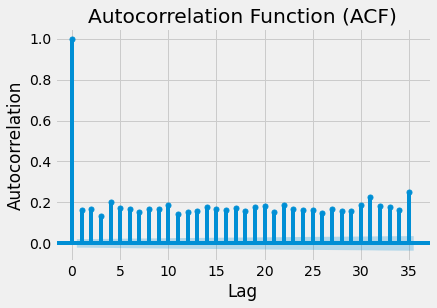

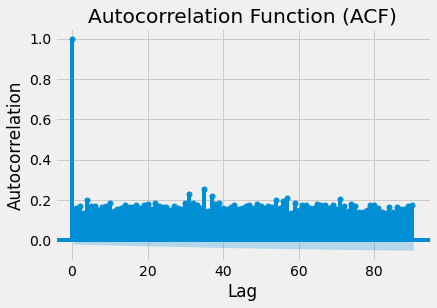

In [42]:
# one week lag (spikes every ~7)
plot_acf(univariate_df['covid_19_deaths'], lags = 35)  # Adjust the number of lags as needed
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF)')
plt.show()


# one month lag (spikes every ~30)
plot_acf(univariate_df['covid_19_deaths'], lags = 90)  # Adjust the number of lags as needed
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF)')
plt.show()

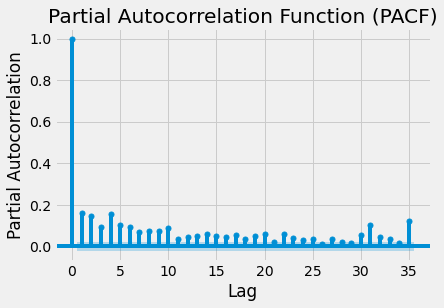

In [43]:
plot_pacf(univariate_df['covid_19_deaths'], lags = 35)  # Adjust the number of lags as needed
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

# Bivariate 

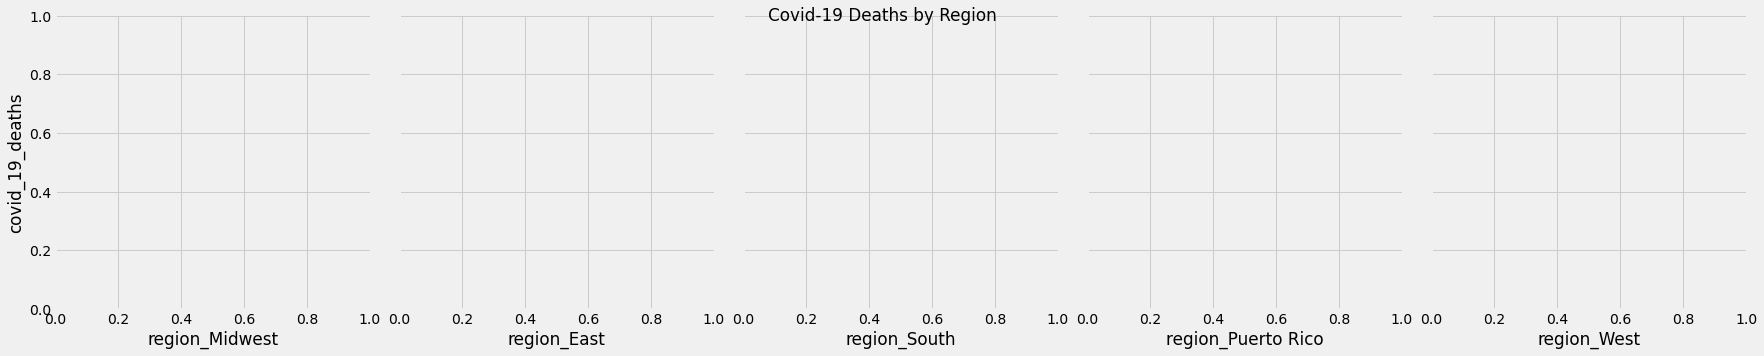

In [44]:
data['covid_19_deaths_adjusted'] = data['covid_19_deaths'] 

sns.pairplot(data.dropna(),
             x_vars=['region_Midwest', 'region_East', 'region_South', 'region_Puerto Rico', 'region_West'],
             y_vars='covid_19_deaths',
             height=5,
             plot_kws={'alpha': 0.2, 'linewidth': 0}
            )
plt.suptitle('Covid-19 Deaths by Region')
plt.show()

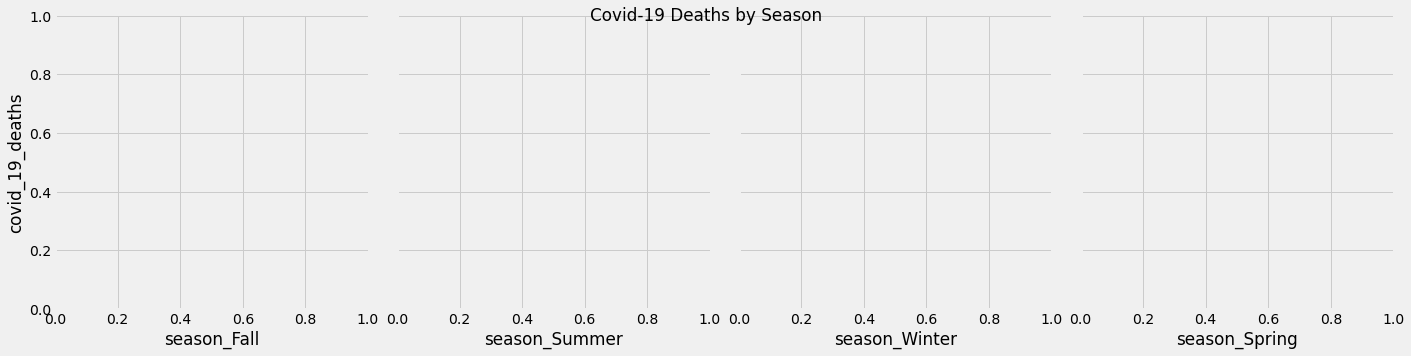

In [45]:
data['covid_19_deaths_adjusted'] = data['covid_19_deaths'] 

sns.pairplot(data.dropna(),
             x_vars=['season_Fall', 'season_Summer', 'season_Winter', 'season_Spring'],
             y_vars='covid_19_deaths',
             height=5,
             plot_kws={'alpha': 0.2, 'linewidth': 0}
            )
plt.suptitle('Covid-19 Deaths by Season')
plt.show()

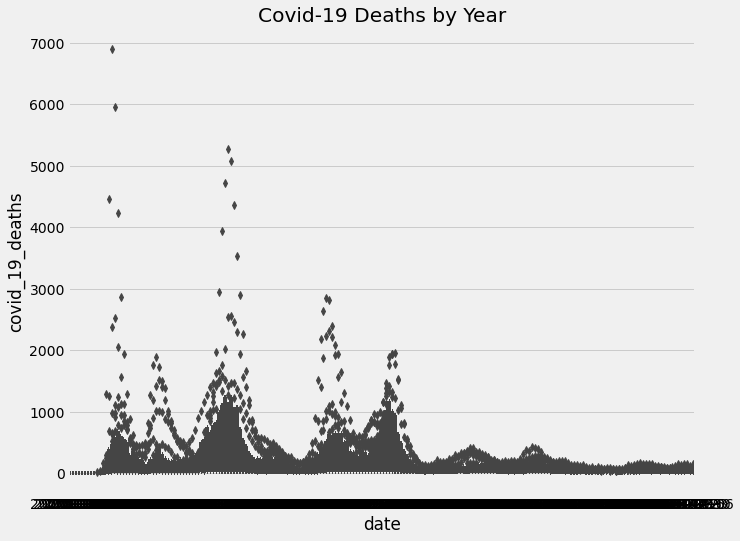

In [46]:
# visualize the Covid-19 Deaths by Date
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=data, x='date', y='covid_19_deaths')
ax.set_title('Covid-19 Deaths by Year')
plt.show()

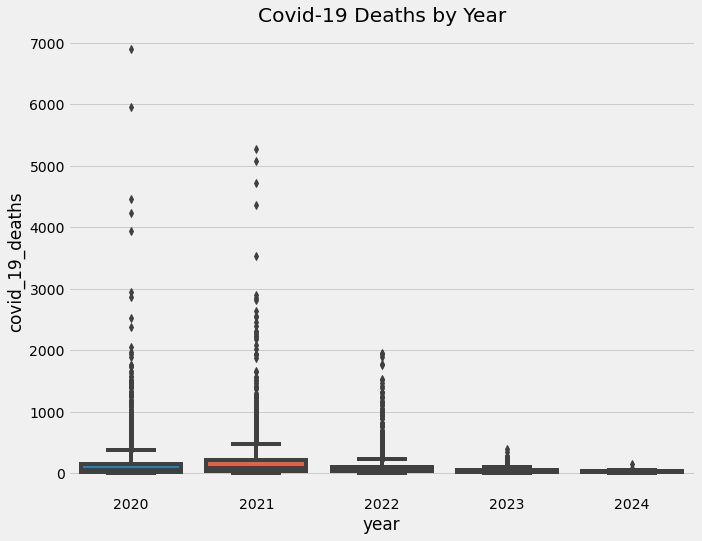

In [47]:
# visualize the Covid-19 Deaths by Year
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=data, x='year', y='covid_19_deaths')
ax.set_title('Covid-19 Deaths by Year')
plt.show()

#  Correlation

In [48]:
correlations = data.corrwith(data["covid_19_deaths"])
correlations_df = pd.DataFrame({'feature': correlations.index, 'correlation': correlations.values})
correlations_df.sort_values(by = ['correlation'], ascending = False)

,feature,correlation
112,covid_19_deaths_adjusted,1.000000
2,covid_19_deaths,1.000000
73,additional_doses_5plus,0.626565
88,second_booster_65plus,0.607488
87,second_booster_50plus,0.585957
...,...,...
27,admin_per_100k_18plus,-0.247874
39,administered_dose1_recip_65plus_pop_pct,-0.261466
49,series_complete_65plus_pop_pct,-0.265322
28,admin_per_100k_65plus,-0.273770


In [49]:
# Remove constant features
constant_features = data.columns[data.nunique() == 1]
print(constant_features)

Index([], dtype='object')


In [50]:
#remove redundant features
corr_matrix = data.corr().abs()
upper_triangle = np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
correlated_columns = [column for column in corr_matrix.columns if any(corr_matrix[column] > 0.5)]

In [51]:
correlated_columns

['year',
 'mmwr_week',
 'covid_19_deaths',
 'distributed',
 'distributed_janssen',
 'distributed_moderna',
 'distributed_pfizer',
 'distributed_novavax',
 'distributed_unk_manuf',
 'dist_per_100k',
 'distributed_per_100k_5plus',
 'distributed_per_100k_12plus',
 'distributed_per_100k_18plus',
 'distributed_per_100k_65plus',
 'administered',
 'administered_5plus',
 'administered_12plus',
 'administered_18plus',
 'administered_65plus',
 'administered_janssen',
 'administered_moderna',
 'administered_pfizer',
 'administered_novavax',
 'administered_unk_manuf',
 'admin_per_100k',
 'admin_per_100k_5plus',
 'admin_per_100k_12plus',
 'admin_per_100k_18plus',
 'admin_per_100k_65plus',
 'recip_administered',
 'administered_dose1_recip',
 'administered_dose1_pop_pct',
 'administered_dose1_recip_5plus',
 'administered_dose1_recip_5plus_pop_pct',
 'administered_dose1_recip_12plus',
 'administered_dose1_recip_12plus_pop_pct',
 'administered_dose1_recip_18plus',
 'administered_dose1_recip_18plus_pop_

In [52]:
print("Correlation Matrix:")
print(corr_matrix)

Correlation Matrix:
                              year  mmwr_week  covid_19_deaths  distributed  \
year                      1.000000   0.033363         0.159780     0.303141   
mmwr_week                 0.033363   1.000000         0.003123     0.038266   
covid_19_deaths           0.159780   0.003123         1.000000     0.134438   
distributed               0.303141   0.038266         0.134438     1.000000   
distributed_janssen       0.257668   0.027506         0.167370     0.977599   
...                            ...        ...              ...          ...   
season_Fall               0.013964   0.555491         0.015092     0.031080   
season_Spring             0.006384   0.403033         0.057323     0.072731   
season_Summer             0.035391   0.065263         0.070978     0.034136   
season_Winter             0.040073   0.218917         0.133806     0.006896   
covid_19_deaths_adjusted  0.159780   0.003123         1.000000     0.134438   

                          distr

In [53]:
correlation_matrix = data.corr()['covid_19_deaths']
print("Correlation Matrix with Target Variable:")
print(correlation_matrix)

Correlation Matrix with Target Variable:
year                       -0.159780
mmwr_week                   0.003123
covid_19_deaths             1.000000
distributed                 0.134438
distributed_janssen         0.167370
                              ...   
season_Fall                -0.015092
season_Spring              -0.057323
season_Summer              -0.070978
season_Winter               0.133806
covid_19_deaths_adjusted    1.000000
Name: covid_19_deaths, Length: 113, dtype: float64


<AxesSubplot:>

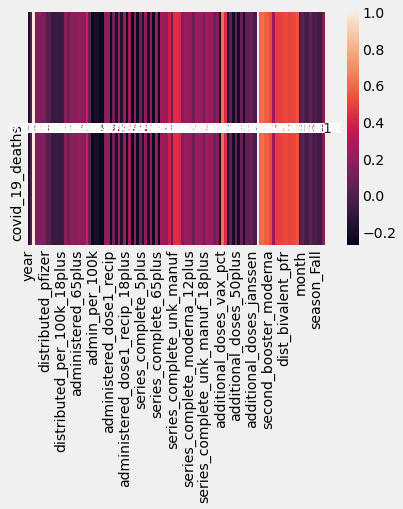

In [54]:
correlation_df = pd.DataFrame(correlation_matrix)
sns.heatmap(correlation_df.transpose(), annot=True)

# Lag + Rolling Mean 

In [55]:
data.sort_values(by='date', inplace=True)

# Lag features
num_lags = 3  # Number of lag features
for i in range(1, num_lags + 1):
    data[f'covid_19_deaths_lag_{i}'] = data['covid_19_deaths'].shift(i)

# Rolling statistics
window_size = 7  # Rolling window size
data['rolling_mean'] = data['covid_19_deaths'].rolling(window=window_size).mean()
data['rolling_std'] = data['covid_19_deaths'].rolling(window=window_size).std()

# Print the updated DataFrame to verify the changes
print(data) 

                                     date location  year  mmwr_week  \
1970-01-01 00:00:00.000000000  2020-01-04       AL  2020          1   
1970-01-01 00:00:00.000000028  2020-01-04       OR  2020          1   
1970-01-01 00:00:00.000000029  2020-01-04       OK  2020          1   
1970-01-01 00:00:00.000000030  2020-01-04       SC  2020          1   
1970-01-01 00:00:00.000000031  2020-01-04       OH  2020          1   
...                                   ...      ...   ...        ...   
1970-01-01 00:00:00.000008926  2024-01-06       DE  2024          1   
1970-01-01 00:00:00.000008927  2024-01-06       CT  2024          1   
1970-01-01 00:00:00.000008928  2024-01-06       CA  2024          1   
1970-01-01 00:00:00.000008930  2024-01-06       AZ  2024          1   
1970-01-01 00:00:00.000008948  2024-01-06       NV  2024          1   

                               covid_19_deaths  distributed  \
1970-01-01 00:00:00.000000000              0.0          0.0   
1970-01-01 00:00:00.0

In [56]:
# Sort the DataFrame by 'End Date' 
data.sort_values(by='date', inplace=True)

# Lag features
num_lags = 28  # Number of lag features
for i in range(1, num_lags + 1):
    data[f'covid_19_deaths_lag_{i}'] = data['covid_19_deaths'].shift(i)

# Rolling statistics
window_size = 7  # Rolling window size
data['rolling_mean'] = data['covid_19_deaths'].rolling(window=window_size).mean()
data['rolling_std'] = data['covid_19_deaths'].rolling(window=window_size).std()

# Print the updated DataFrame to verify the changes
print(data) 

                                     date location  year  mmwr_week  \
1970-01-01 00:00:00.000000000  2020-01-04       AL  2020          1   
1970-01-01 00:00:00.000000025  2020-01-04       MD  2020          1   
1970-01-01 00:00:00.000000002  2020-01-04       VA  2020          1   
1970-01-01 00:00:00.000000003  2020-01-04       KY  2020          1   
1970-01-01 00:00:00.000000004  2020-01-04       KS  2020          1   
...                                   ...      ...   ...        ...   
1970-01-01 00:00:00.000008946  2024-01-06       NJ  2024          1   
1970-01-01 00:00:00.000008932  2024-01-06       GA  2024          1   
1970-01-01 00:00:00.000008939  2024-01-06       SD  2024          1   
1970-01-01 00:00:00.000008922  2024-01-06       IL  2024          1   
1970-01-01 00:00:00.000008948  2024-01-06       NV  2024          1   

                               covid_19_deaths  distributed  \
1970-01-01 00:00:00.000000000              0.0          0.0   
1970-01-01 00:00:00.0

# non binary categorical columns

# Find the non-binary categorical columns
cat_cols = []
for col in data.columns:
    if data[col].dtype == 'object' and len(data[col].unique()) > 2:
        cat_cols.append(col)
print("Non-binary categorical columns:", cat_cols)

# Create binary columns from the categorical columns
data = pd.get_dummies(data, columns=cat_cols)

# Print the resulting dataframe
print(data.head())

# Training the Data


In [31]:
# Convert date column to datetime type
data['date'] = pd.to_datetime(data['date'])

# Extract features from date (e.g., year, month, day)
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day


In [32]:
# Assuming 'state_column' is the column containing state abbreviations like 'MT'
# Perform one-hot encoding
X = pd.get_dummies(X, columns=['state_column'])

KeyError: "None of [Index(['state_column'], dtype='object')] are in the [columns]"

In [33]:
# Split the target value and the features
y = data['covid_19_deaths']
X = data.drop(['covid_19_deaths'], axis=1) 

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

# Scale the features
scaler = StandardScaler()

# Fit and transform the training data
xscaler_train = scaler.fit_transform(X_train)

# Only transform the test data (do not fit again)
xscaler_test = scaler.transform(X_test)

TypeError: float() argument must be a string or a number, not 'Timestamp'

# ARIMA

Mean Squared Error: 8001.8852652160085


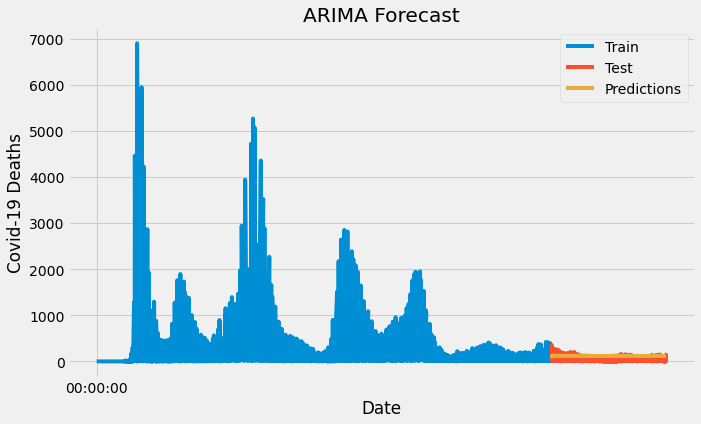

In [59]:
from statsmodels.tsa.arima.model import ARIMA

# Assuming 'data' contains your dataset with a DateTime index and a column named 'covid_19_deaths'
# If not, replace 'covid_19_deaths' with the actual column name of your time series variable
# Ensure that the index is a DateTimeIndex
data.index = pd.to_datetime(data.index)

# Split the data into training and testing sets
train_size = int(len(data) * 0.8)  # 80% train, 20% test
train_data, test_data = data.iloc[:train_size], data.iloc[train_size:]

# Fit ARIMA model
model = ARIMA(train_data['covid_19_deaths'], order=(5,1,0))  # Example order (p, d, q)
fitted_model = model.fit()

# Make predictions
predictions = fitted_model.forecast(steps=len(test_data))

# Evaluate the model
mse = mean_squared_error(test_data['covid_19_deaths'], predictions)
print("Mean Squared Error:", mse)

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['covid_19_deaths'], label='Train')
plt.plot(test_data.index, test_data['covid_19_deaths'], label='Test')
plt.plot(test_data.index, predictions, label='Predictions')
plt.xlabel('Date')
plt.ylabel('Covid-19 Deaths')
plt.title('ARIMA Forecast')
plt.legend()
plt.show()

# LSTM

In [60]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Assuming 'data' contains your dataset with a column named 'covid_19_deaths'
# If not, replace 'covid_19_deaths' with the actual column name of your time series variable
# Ensure that the index is a DateTimeIndex
data.index = pd.to_datetime(data.index)

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[['covid_19_deaths']])

# Split the data into train and test sets
train_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

# Define function to create sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Define sequence length
seq_length = 10  # You can adjust this value based on the sequence length you want to consider

# Create sequences for LSTM
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

# Define and train the LSTM model
model = Sequential([
    LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Inverse transform the predictions
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)

# Plot predictions
plt.figure(figsize=(10, 6))
plt.plot(data.index[:len(train_data)], data['covid_19_deaths'][:len(train_data)], label='Train')
plt.plot(data.index[len(train_data)+seq_length:len(train_data)+seq_length+len(test_data)], data['covid_19_deaths'][len(train_data)+seq_length:len(train_data)+seq_length+len(test_data)], label='Test')
plt.plot(data.index[:len(train_data)], np.concatenate([np.full(seq_length, np.nan), train_predictions.flatten()]), label='Train Predictions')
plt.plot(data.index[len(train_data)+seq_length:], np.concatenate([np.full(seq_length, np.nan), test_predictions.flatten()]), label='Test Predictions')
plt.xlabel('Date')
plt.ylabel('Covid-19 Deaths')
plt.title('LSTM Forecast')
plt.legend()
plt.show()


In [ ]:
# Calculate MSE
mse = mean_squared_error(X_test, test_predictions)
print("Mean Squared Error:", mse)

# PACF + ACF

In [ ]:
# Assuming 'data' contains your time series data with a DateTime index
# If not, set the index to your DateTime column
# Replace 'covid_19_deaths' with the name of your target variable
ts = data['covid_19_deaths']

# 1. Visual Inspection
plt.figure(figsize=(10, 6))
plt.plot(ts)
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('covid_19_deaths')
plt.show()

# 2. Summary Statistics
print("Mean:", ts.mean())
print("Variance:", ts.var())

# 3. Augmented Dickey-Fuller (ADF) Test
adf_result = adfuller(ts)
print("ADF Test p-value:", adf_result[1])

# 5. Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF)
plt.figure(figsize=(10, 6))
plot_acf(ts, lags=50, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

plt.figure(figsize=(10, 6))
plot_pacf(ts, lags=50, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()


In [ ]:
# Extract the column 'covid_19_deaths' from the DataFrame 'data'
X = data['covid_19_deaths'].values  # Ensure to use .values to convert the column to a one-dimensional NumPy array

# Apply the ADF test
result = adfuller(X)

# Print the test results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))


In [ ]:
# spike for one month

acf_values, confint = pacf(univariate_df['covid_19_deaths'], alpha=0.05,nlags=120)
lags = np.arange(0, len(acf_values))

lower_bound = confint[1:, 0] - acf_values[1:]
upper_bound = confint[1:, 1] - acf_values[1:]

plt.bar(lags, acf_values, width=0.5, align='center', label='ACF')
plt.fill_between(lags[1:], lower_bound, upper_bound, color='red', alpha=0.2, label='95% Confidence Interval')
plt.plot(lags[1:], upper_bound, color='grey', lw=0.3)
plt.plot(lags[1:], lower_bound, color='grey', lw=0.3)
plt.xlabel('Lags')
plt.tight_layout()

# Adding Holiday Features 

In [ ]:
! pip install --upgrade holidays

In [158]:
print (data.head())

         date location  year  mmwr_week  covid_19_deaths  distributed  \
0  2020-01-04       AL  2020          1              0.0          0.0   
1  2020-01-04       LA  2020          1              0.0          0.0   
2  2020-01-04       VA  2020          1              0.0          0.0   
3  2020-01-04       KY  2020          1              0.0          0.0   
4  2020-01-04       KS  2020          1              0.0          0.0   

   distributed_janssen  distributed_moderna  distributed_pfizer  \
0                  0.0                  0.0                 0.0   
1                  0.0                  0.0                 0.0   
2                  0.0                  0.0                 0.0   
3                  0.0                  0.0                 0.0   
4                  0.0                  0.0                 0.0   

   distributed_novavax  ...  month  region_East  region_Midwest  \
0                  0.0  ...      1            0               0   
1                  0.0  

In [159]:
data.head()

,date,location,year,mmwr_week,covid_19_deaths,distributed,distributed_janssen,distributed_moderna,distributed_pfizer,distributed_novavax,...,month,region_East,region_Midwest,region_Puerto Rico,region_South,region_West,season_Fall,season_Spring,season_Summer,season_Winter
0,2020-01-04,AL,2020,1,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,1,0,0,0,0,1
1,2020-01-04,LA,2020,1,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,1,0,0,0,0,1
2,2020-01-04,VA,2020,1,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,1,0,0,0,0,1
3,2020-01-04,KY,2020,1,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,1,0,0,0,0,1
4,2020-01-04,KS,2020,1,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,1,0,0,0,0,0,0,1


In [ ]:
# Lag one week
data['death_half_year_lag'] = data.groupby(['location'])['covid_19_deaths'].shift(26)

# Lag two weeks
data['deaths_1_year_lag'] = data.groupby(['location'])['covid_19_deaths'].shift(52)

# Lag three weeks
data['deaths_1_andhalf_year_lag'] = data.groupby(['location'])['covid_19_deaths'].shift(78)

# Lag one month
data['deaths_2_years_lag'] = data.groupby(['location'])['covid_19_deaths'].shift(104)

# Rolling window mean
data['deaths_half_year_lag_mean'] = data.groupby(['location'])['covid_19_deaths'].rolling(window=26).mean().reset_index(drop=True)
data['deaths_1_year_lag_mean'] = data.groupby(['location'])['covid_19_deaths'].rolling(window=52).mean().reset_index(drop=True)
data['deaths_1_andhalf_year_lag_mean'] = data.groupby(['location'])['covid_19_deaths'].rolling(window=78).mean().reset_index(drop=True)
data['deaths_2_years_lag_mean'] = data.groupby(['location'])['covid_19_deaths'].rolling(window=104).mean().reset_index(drop=True)


# Rolling window std dev
data['deaths_half_year_lag_std'] = data.groupby(['location'])['covid_19_deaths'].rolling(window=26).mean().reset_index(drop=True)
data['deaths_1_year_lag_std'] = data.groupby(['location'])['covid_19_deaths'].rolling(window=52).mean().reset_index(drop=True)
data['deaths_1_andhalf_year_lag_std'] = data.groupby(['location'])['covid_19_deaths'].rolling(window=78).mean().reset_index(drop=True)
data['deaths_2_years_lag_std'] = data.groupby(['location'])['covid_19_deaths'].rolling(window=104).mean().reset_index(drop=True)


# Rolling window max
data['deaths_half_year_lag_max'] = data.groupby(['location'])['covid_19_deaths'].rolling(window=26).mean().reset_index(drop=True)
data['deaths_1_year_lag_max'] = data.groupby(['location'])['covid_19_deaths'].rolling(window=52).mean().reset_index(drop=True)
data['deaths_1_andhalf_year_lag_max'] = data.groupby(['location'])['covid_19_deaths'].rolling(window=78).mean().reset_index(drop=True)
data['deaths_2_years_lag_max'] = data.groupby(['location'])['covid_19_deaths'].rolling(window=104).mean().reset_index(drop=True)


# Rolling window min
data['deaths_half_year_lag_min'] = data.groupby(['location'])['covid_19_deaths'].rolling(window=26).mean().reset_index(drop=True)
data['deaths_1_year_lag_min'] = data.groupby(['location'])['covid_19_deaths'].rolling(window=52).mean().reset_index(drop=True)
data['deaths_1_andhalf_year_lag_min'] = data.groupby(['location'])['covid_19_deaths'].rolling(window=78).mean().reset_index(drop=True)
data['deaths_2_years_lag_min'] = data.groupby(['location'])['covid_19_deaths'].rolling(window=104).mean().reset_index(drop=True)


data['date']= pd.to_datetime(data['date'])

In [160]:
data['holidays'] = data['date'].apply( lambda x: 'Holiday' if x in holidays.US() 
                                      else 'Holiday' if x + datetime.timedelta(days=1) in holidays.US() else 'Normal day' )

TypeError: can only concatenate str (not "datetime.timedelta") to str

data = data.set_index('date')

In [ ]:
data['date'] = data.index
data['dayofweek'] = data['date'].dt.dayofweek
data['quarter'] = data['date'].dt.quarter
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year
data['dayofyear'] = data['date'].dt.dayofyear
data['dayofmonth'] = data['date'].dt.day
data['weekofyear'] = data['date'].dt.isocalendar().week.astype(np.int64)

In [ ]:
features_and_target3 = data[['dayofweek', 'quarter', 'month', 'year', 'dayofyear', 'dayofmonth', 'weekofyear', 'deaths_half_year_lag',
 'deaths_1_year_lag',
 'deaths_1_andhalf_year_lag',
 'deaths_2_years_lag',
 'deaths_half_year_lag_mean',
 'deaths_1_year_lag_mean',
 'deaths_1_andhalf_year_lag_mean',
 'deaths_2_years_lag_mean',
 'deaths_half_year_lag_std',
 'deaths_1_year_lag_std',
 'deaths_1_andhalf_year_lag_std',
 'deaths_2_years_lag_std',
 'deaths_half_year_lag_max',
 'deaths_1_year_lag_max',
 'deaths_1_andhalf_year_lag_max',
 'deaths_2_years_lag_max',
 'deaths_half_year_lag_min',
 'deaths_1_year_lag_min',
 'deaths_1_andhalf_year_lag_min',
 'deaths_2_years_lag_min','covid_19_deaths']]
features_and_target3                                               

# Prophet

In [142]:
data

,location,year,mmwr_week,covid_19_deaths,distributed,distributed_janssen,distributed_moderna,distributed_pfizer,distributed_novavax,distributed_unk_manuf,...,deaths_1_year_lag_min,deaths_1_andhalf_year_lag_min,deaths_2_years_lag_min,holidays,date,dayofweek,quarter,dayofyear,dayofmonth,weekofyear
date,,,,,,,,,,,,,,,,,,,,,
1970-01-01 00:00:00.000000000,AL,1970,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,Holiday,1970-01-01 00:00:00.000000000,3,1,1,1,1
1970-01-01 00:00:00.000000001,LA,1970,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,Holiday,1970-01-01 00:00:00.000000001,3,1,1,1,1
1970-01-01 00:00:00.000000002,VA,1970,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,Holiday,1970-01-01 00:00:00.000000002,3,1,1,1,1
1970-01-01 00:00:00.000000003,KY,1970,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,Holiday,1970-01-01 00:00:00.000000003,3,1,1,1,1
1970-01-01 00:00:00.000000004,KS,1970,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,Holiday,1970-01-01 00:00:00.000000004,3,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1970-01-01 00:00:00.000008944,OH,1970,1,23.0,0.0,0.0,0.0,0.0,0.0,0.0,...,25.288462,NaN,NaN,Holiday,1970-01-01 00:00:00.000008944,3,1,1,1,1
1970-01-01 00:00:00.000008945,NY,1970,1,145.0,0.0,0.0,0.0,0.0,0.0,0.0,...,24.596154,NaN,NaN,Holiday,1970-01-01 00:00:00.000008945,3,1,1,1,1
1970-01-01 00:00:00.000008946,NJ,1970,1,39.0,0.0,0.0,0.0,0.0,0.0,0.0,...,23.846154,18.641026,NaN,Holiday,1970-01-01 00:00:00.000008946,3,1,1,1,1


# Univariate Prophet

14:42:38 - cmdstanpy - INFO - Chain [1] start processing
14:42:38 - cmdstanpy - INFO - Chain [1] done processing


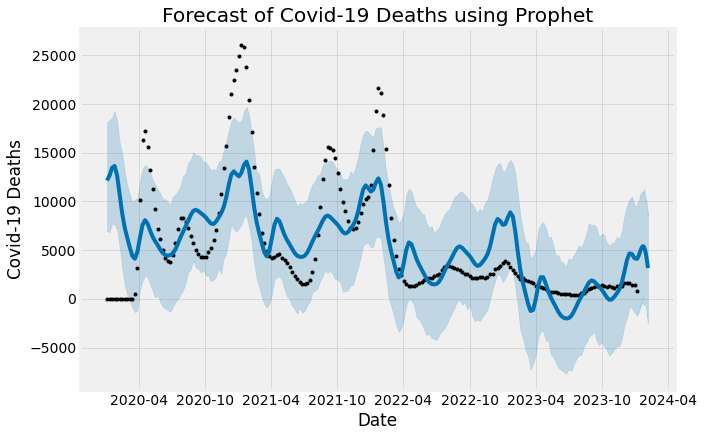

In [143]:
#using univariate data 
from prophet import Prophet

# Assuming 'data' contains your dataset with a DateTime index and a column named 'covid_19_deaths'
# If not, replace 'covid_19_deaths' with the actual column name of your time series variable
data_prophet = univariate_combined.reset_index()  # Reset index to use 'ds' as the time column
data_prophet = data_prophet.rename(columns={'date': 'ds', 'covid_19_deaths': 'y'})  # Rename columns for Prophet

# Initialize Prophet model
model = Prophet()

# Fit the model to the data
model.fit(data_prophet)

# Define future dates for prediction
future_dates = model.make_future_dataframe(periods=30)  # Forecast for 30 days into the future

# Make predictions
forecast = model.predict(future_dates)

# Plot the forecast
fig = model.plot(forecast)
plt.xlabel('Date')
plt.ylabel('Covid-19 Deaths')
plt.title('Forecast of Covid-19 Deaths using Prophet')
plt.show()

# Multivariate Prophet 

In [144]:
print(data_prophet.columns)

Index(['ds', 'y'], dtype='object')


In [145]:
# 2 regressors
from prophet import Prophet

# Assuming 'data' is your DataFrame with 'date', 'covid_19_deaths', 'month', 'season_Winter', etc.
data_prophet = data.rename(columns={'dayofweek': 'ds', 'covid_19_deaths': 'y', 'second_booster_65plus': 'regressor1', 'additional_doses_5plus': 'regressor2',})

data_prophet.dropna(subset=['regressor2'], inplace=True)

# Initialize Prophet model
model = Prophet()

# Add additional regressors to the model
model.add_regressor('regressor1')
model.add_regressor('regressor2')


# Fit the model to the data
model.fit(data_prophet)

# Define future dates for prediction
future_dates = model.make_future_dataframe(periods=30)  # Forecast for 30 days into the future

# Here, you need to provide the values for the future regressors
# For demonstration purposes, I'm using a constant value
# Replace these values with your actual future regressor values
future_regressor_values_for_future_dates = 0  # Example value for regressor1
future_dates['regressor1'] = future_regressor_values_for_future_dates

future_regressor_values_for_future_dates = 0  # Example value for regressor2
future_dates['regressor2'] = future_regressor_values_for_future_dates


# Make predictions
forecast = model.predict(future_dates)

# Plot the forecast along with the additional regressors
fig = model.plot(forecast, xlabel='Date', ylabel='Covid-19 Deaths')
plt.title('Preliminary Forecast using Multivariate Prophet Model')
plt.show()

ValueError: Given date string not likely a datetime.

14:42:41 - cmdstanpy - INFO - Chain [1] start processing
14:42:42 - cmdstanpy - INFO - Chain [1] done processing


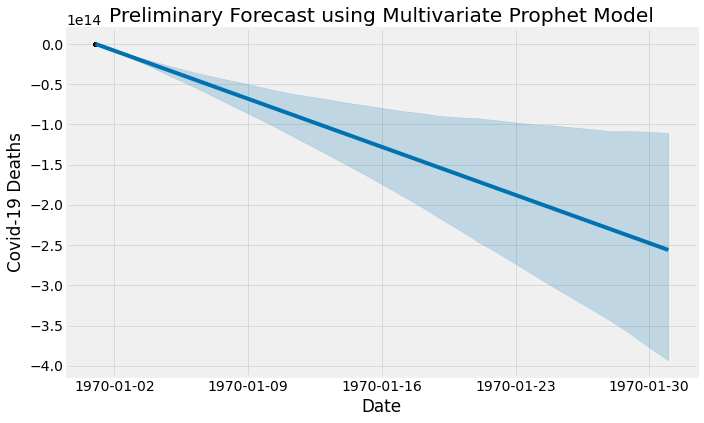

In [146]:
# 3 regressors
from prophet import Prophet

# Assuming 'data' is your DataFrame with 'date', 'covid_19_deaths', 'month', 'season_Winter', etc.
data_prophet = data.rename(columns={'date': 'ds', 'covid_19_deaths': 'y', 'second_booster_65plus': 'regressor1', 'additional_doses_5plus': 'regressor2','bivalent_booster_65plus': 'regressor3',})

data_prophet.dropna(subset=['regressor2'], inplace=True)
data_prophet.dropna(subset=['regressor3'], inplace=True) 

# Initialize Prophet model
model = Prophet()

# Add additional regressors to the model
model.add_regressor('regressor1')
model.add_regressor('regressor2')
model.add_regressor('regressor3')

# Fit the model to the data
model.fit(data_prophet)

# Define future dates for prediction
future_dates = model.make_future_dataframe(periods=30)  # Forecast for 30 days into the future

# Here, you need to provide the values for the future regressors
# For demonstration purposes, I'm using a constant value
# Replace these values with your actual future regressor values
future_regressor_values_for_future_dates = 0  # Example value for regressor1
future_dates['regressor1'] = future_regressor_values_for_future_dates

future_regressor_values_for_future_dates = 0  # Example value for regressor2
future_dates['regressor2'] = future_regressor_values_for_future_dates

future_regressor_values_for_future_dates = 0  # Example value for regressor2
future_dates['regressor3'] = future_regressor_values_for_future_dates

# Make predictions
forecast = model.predict(future_dates)

# Plot the forecast along with the additional regressors
fig = model.plot(forecast, xlabel='Date', ylabel='Covid-19 Deaths')
plt.title('Preliminary Forecast using Multivariate Prophet Model')
plt.show()


# XgBoost 

# Cyclical Encoding 

In [106]:
# Sample data with a 'date' column
data = {'date': pd.date_range('2020-01-04', '2023-12-31', freq='D')}
df = pd.DataFrame(data)

# Cyclical encoding for months
df['month_sin'] = np.sin(2 * np.pi * df['date'].dt.month / 12)
df['month_cos'] = np.cos(2 * np.pi * df['date'].dt.month / 12)

# Cyclical encoding for months
df['dayofweek_sin'] = np.sin(2 * np.pi * df['date'].dt.dayofweek / 7)
df['dayofweek_cos'] = np.cos(2 * np.pi * df['date'].dt.dayofweek / 7) 

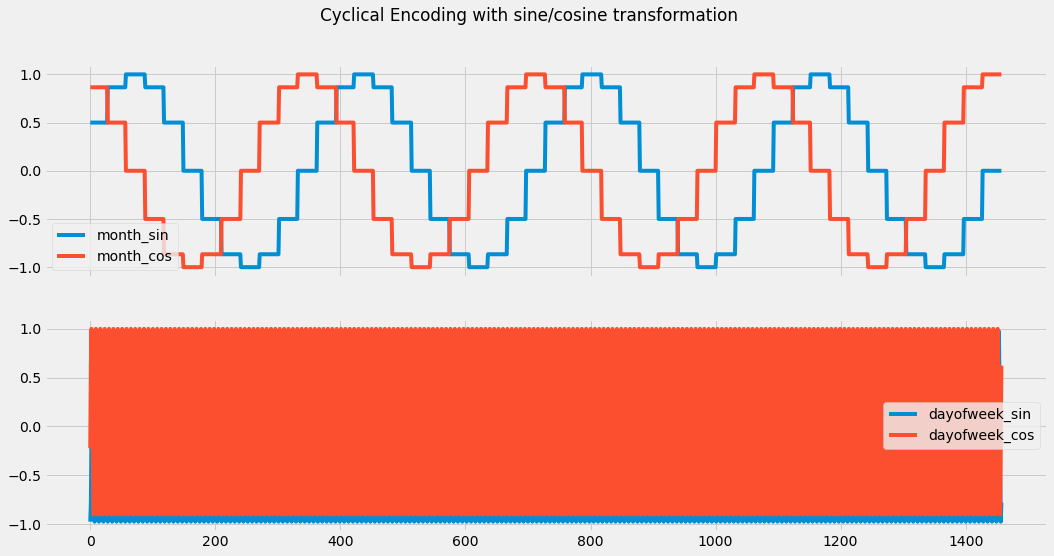

In [107]:
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(16,8))
df[["month_sin", "month_cos"]].plot(ax=ax[0])
df[["dayofweek_sin", "dayofweek_cos"]].plot(ax=ax[1])
plt.suptitle("Cyclical Encoding with sine/cosine transformation");

In [ ]:
# Assuming 'data' is your dictionary where each key represents a variable or column
# Choose any key from the dictionary to access its value and get its length
num_observations = len(data[next(iter(data))])

print("Number of observations:", num_observations)